# Biodiversity in Parks
Portfolio Project written by Gustavo Llanos to analyze and interpret data from the National Parks Service about endangered species in different parks.
## Project Objectives
- Perform some data analysis on the conservation statuses of species 
- Investigate if there are any patterns or themes to the types of species that become endangered
- Analyze, clean up, and plot data
## Overview of the Data
- The data consists of two datasets:
- `Observations.csv` that contains the following variables:
    - `scientific_name` Scientific designation of a particual species
    - `park_name` National Park where is was observed
    -  `observations` Amount of observations
- `species_info.csv` that contains the following variables:
    - `category` Categorical classification of the species
    - `scientific_name` Scientific designation of a particual species
    - `common_names` Common name or non-scientific name
    - `conservation_status` Status of conservation
## Method & Analysis
- Data Load, Cleaning & Analysis
- Initial Assessment 
- Detailed Analysis

### Data Load, Cleaning & Analysis

In [2]:
#import libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import glob

#read csv file into a dataframe
observations_data = pd.read_csv('observations.csv')
species_data = pd.read_csv('species_info.csv')

#print general info about the datasets
print('Observations Data Info')
print('----------------------')
print(observations_data.info(), '\n')
print('Species_info:')
print('-------------')
print(species_data.info(),'\n')

Observations Data Info
----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None 

Species_info:
-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None 



In [3]:
# Merge the two dataframes on 'scientific_name'
all_data = pd.merge(observations_data, species_data, on='scientific_name', how='left')
print('All Data Merged Info:')
print('---------------------')
print(all_data.info(),'\n')
print('All Data Merged Description:')
print('----------------------------')
print(all_data.describe(include='all'))

All Data Merged Info:
---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      25632 non-null  object
 1   park_name            25632 non-null  object
 2   observations         25632 non-null  int64 
 3   category             25632 non-null  object
 4   common_names         25632 non-null  object
 5   conservation_status  880 non-null    object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB
None 

All Data Merged Description:
----------------------------
         scientific_name                            park_name  observations  \
count              25632                                25632  25632.000000   
unique              5541                                    4           NaN   
top     Myotis lucifugus  Great Smoky Mountains National Park           NaN   
freq                  36 

In [4]:
# Identify unique values in parks, categories and conservation_status
print(all_data['park_name'].unique())
print(all_data['category'].unique())
print(all_data['conservation_status'].unique())
display(pd.crosstab(all_data['park_name'], all_data['conservation_status'], values=all_data['observations'],aggfunc='count', margins=True))



['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
['Vascular Plant' 'Mammal' 'Bird' 'Nonvascular Plant' 'Amphibian'
 'Reptile' 'Fish']
[nan 'Species of Concern' 'Threatened' 'Endangered' 'In Recovery']


conservation_status,Endangered,In Recovery,Species of Concern,Threatened,All
park_name,,,,,
Bryce National Park,20,6,183,11,220
Great Smoky Mountains National Park,20,6,183,11,220
Yellowstone National Park,20,6,183,11,220
Yosemite National Park,20,6,183,11,220
All,80,24,732,44,880


### Initial Assesment

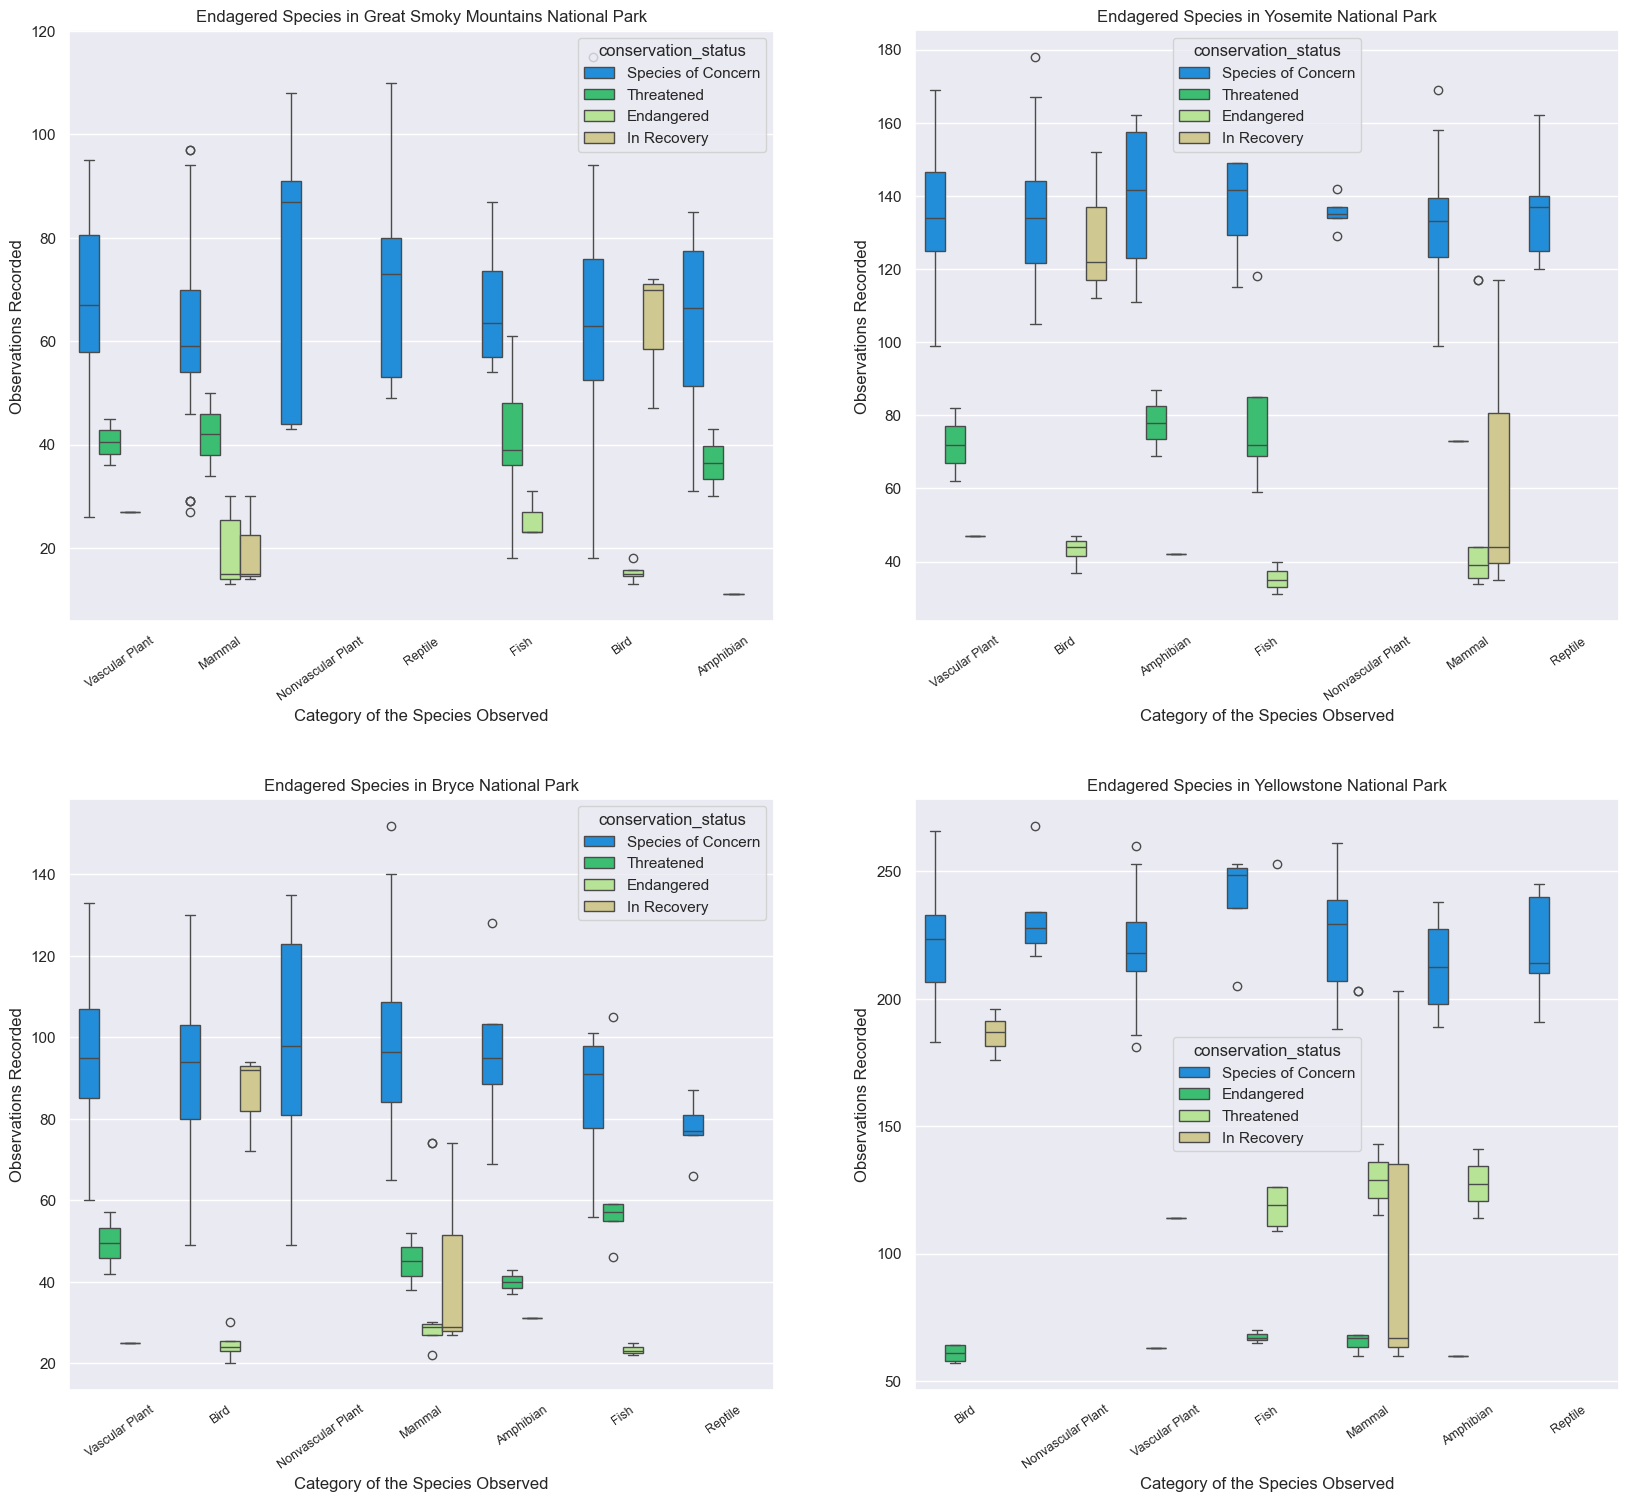

<Figure size 640x480 with 0 Axes>

In [5]:
#set theme for the seaborn plots
sn.set_theme(context='notebook', style='darkgrid', palette='terrain', font='sans-serif', font_scale=1, color_codes=True, rc=None)
#plotting the endagered species
plt.figure(figsize=(20,20))
counter = 1
for items in all_data['park_name'].unique():
    plt.subplot(2,2,counter)
    park_data = all_data[all_data.park_name == items]
    sn.boxplot(data=park_data, x='category', y='observations', hue='conservation_status')
    plt.xticks(rotation=35, fontsize=9)
    plt.title(f'Endagered Species in {items}')
    plt.ylabel('Observations Recorded')
    plt.xlabel(f'Category of the Species Observed')
    counter = counter +1
plt.subplots_adjust(wspace = 0.2, hspace= 0.3, bottom = 0.2)
plt.show()
plt.clf()


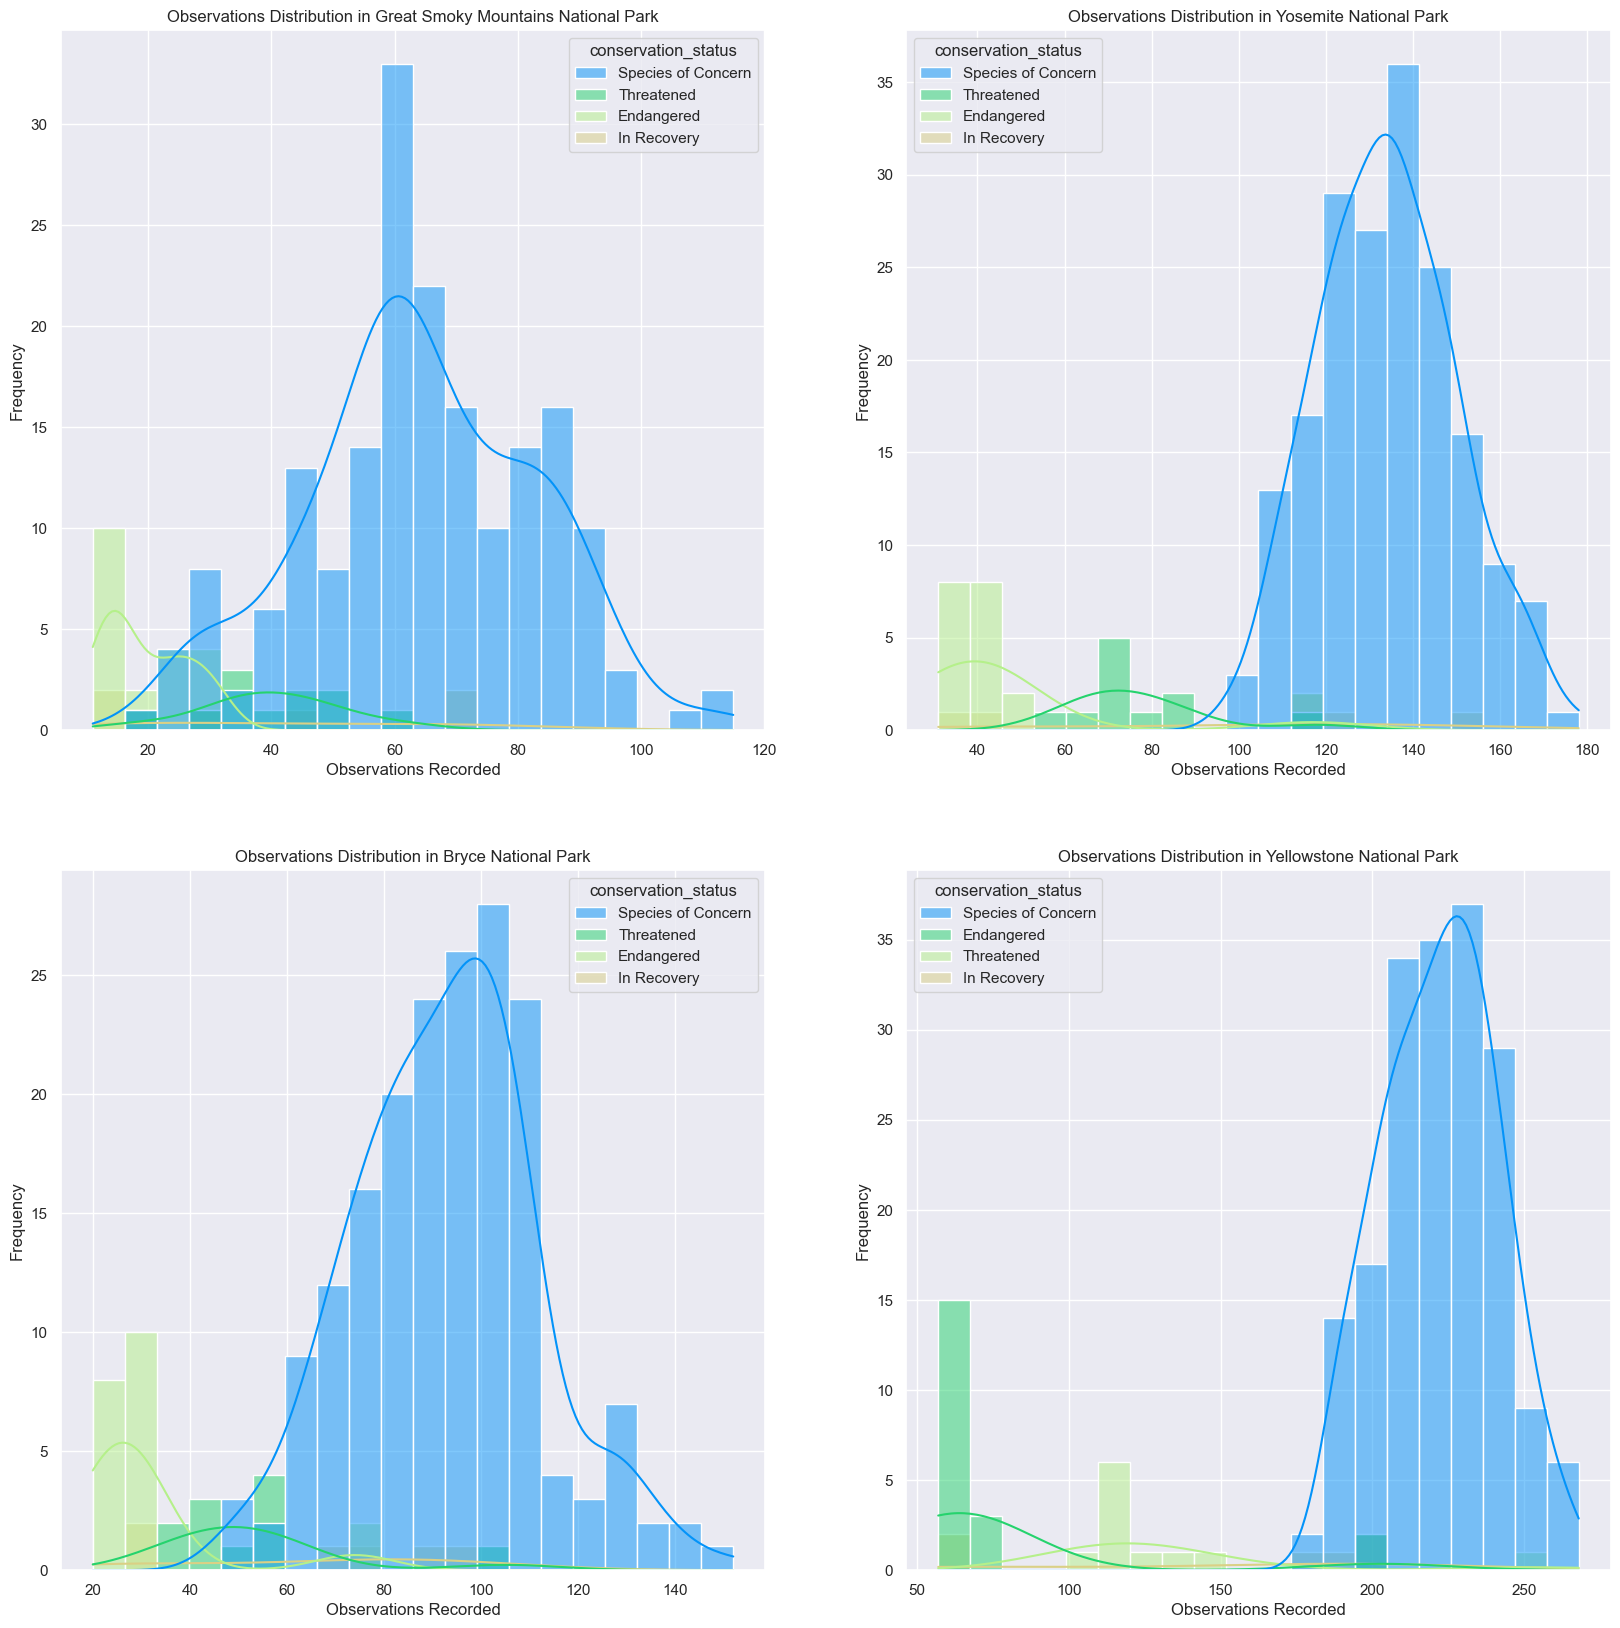

<Figure size 640x480 with 0 Axes>

In [6]:
#Analyze data by park and endanreged species
plt.figure(figsize=(20,20))
counter = 1
for items in all_data['park_name'].unique():
    plt.subplot(2,2,counter)
    park_data = all_data[all_data.park_name == items]
    sn.histplot(data=park_data, x='observations', hue='conservation_status', bins=20, kde=True)
    plt.title(f'Observations Distribution in {items}')
    plt.xlabel('Observations Recorded')
    plt.ylabel('Frequency')
    counter = counter +1
plt.show()
plt.clf()

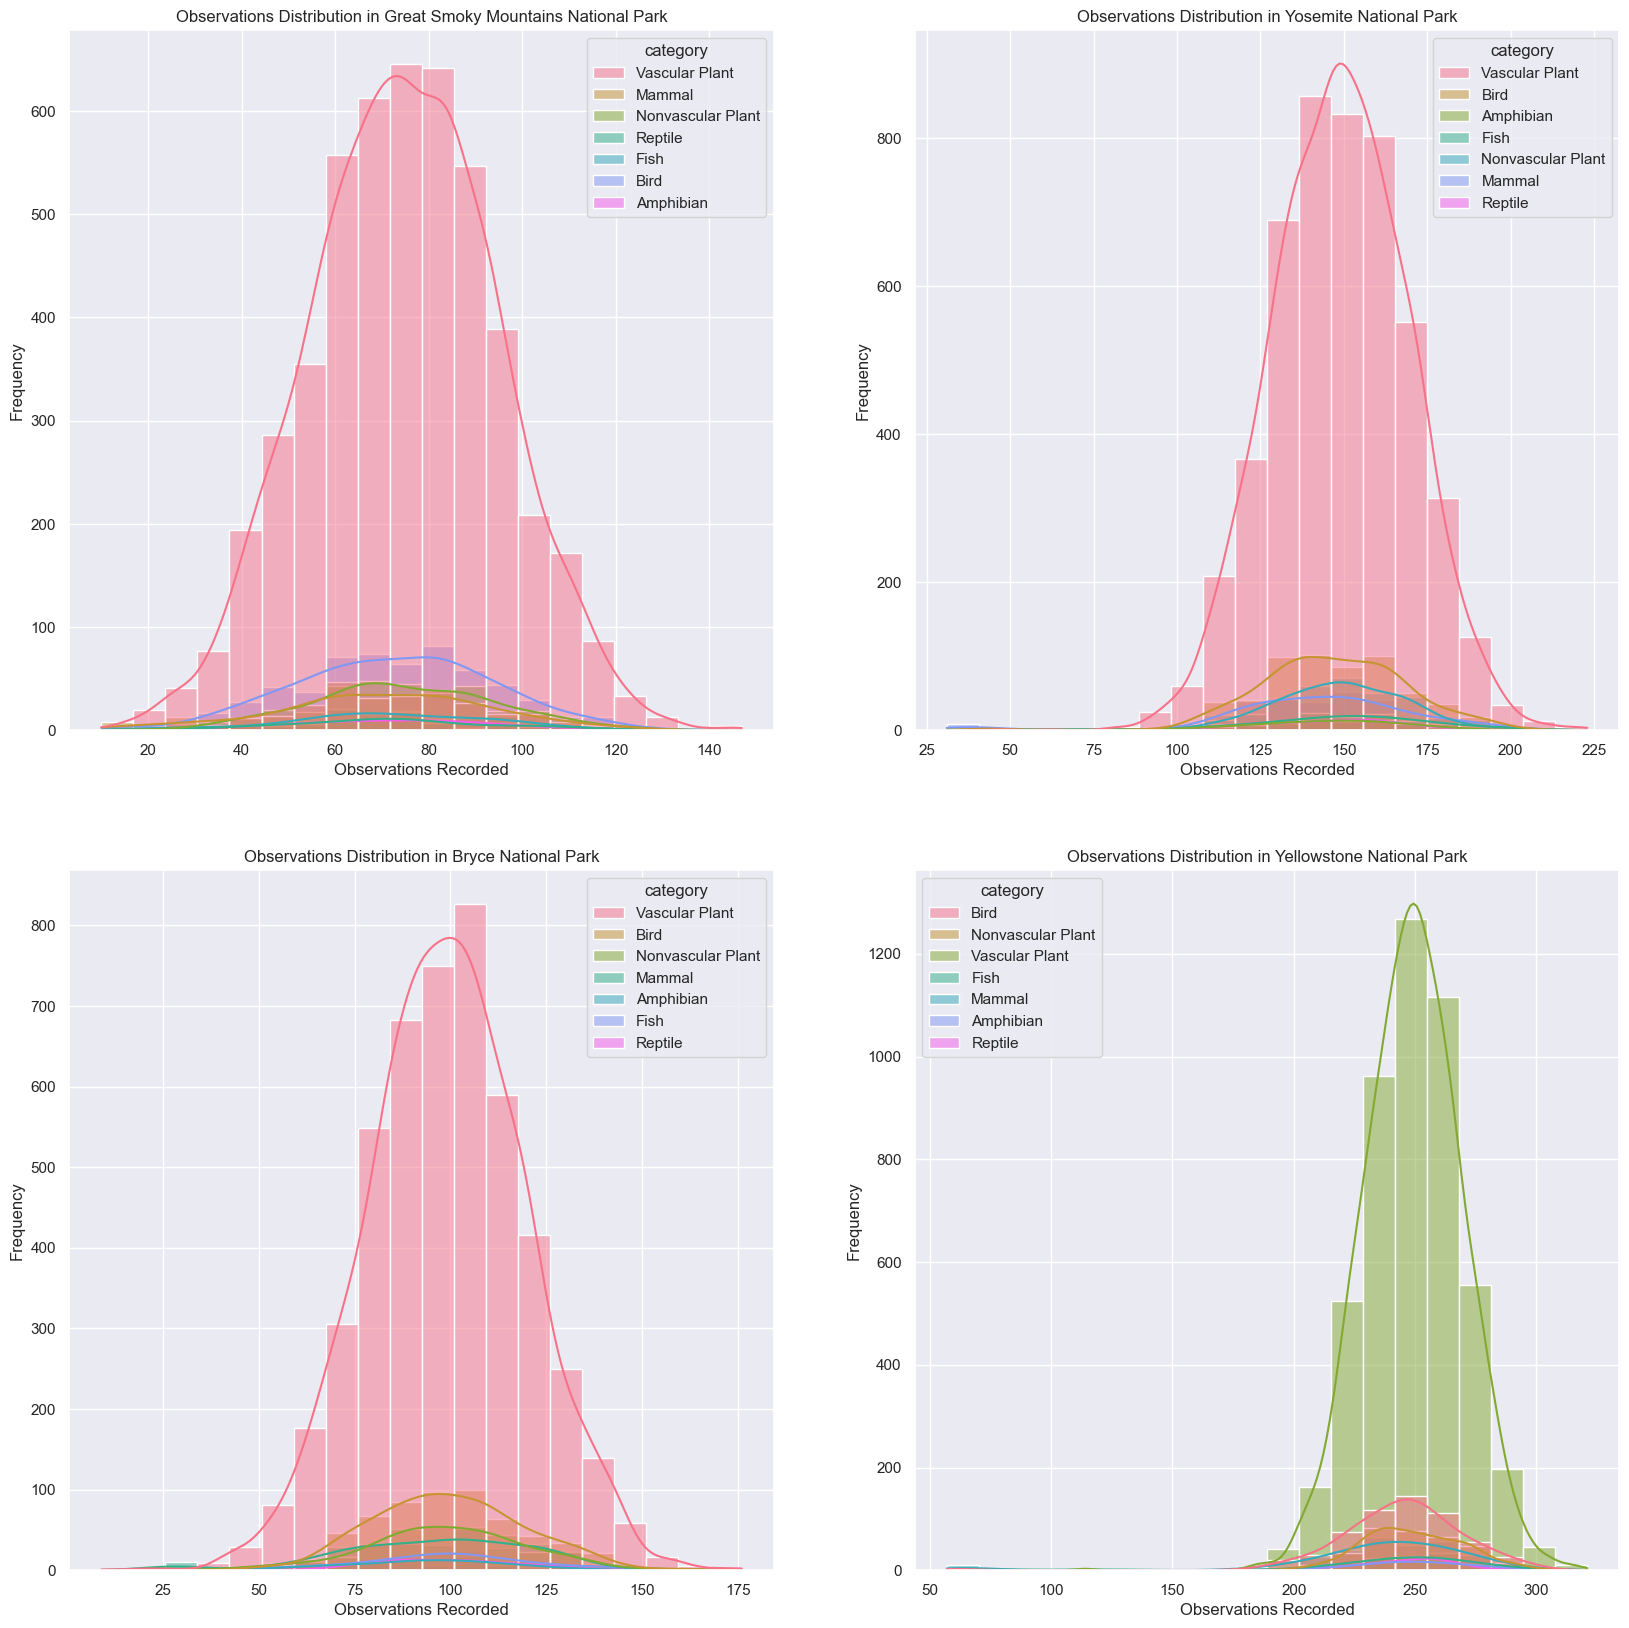

<Figure size 640x480 with 0 Axes>

In [7]:
#Analyze data by park and categories of species
plt.figure(figsize=(20,20))
counter = 1
for items in all_data['park_name'].unique():
    park_data = all_data[all_data.park_name == items]
    plt.subplot(2,2,counter)
    sn.histplot(data=park_data, x='observations', hue='category', bins=20, kde=True)
    plt.title(f'Observations Distribution in {items}')
    plt.xlabel('Observations Recorded')
    plt.ylabel('Frequency')
    counter = counter +1
plt.show()
plt.clf()

### Detailed Analysis

- The dataset contains a lot of data for each park which makes it difficult to plot in one single set of plots. 
- A detalied analysis per park is necessary

In [8]:
for park in all_data['park_name'].unique():
    park_data = all_data[all_data['park_name'] == park]
    cross_tab = pd.crosstab(park_data['conservation_status'], park_data['category'], values=park_data['observations'], aggfunc='sum')
    print(f"Cross Tab for {park}:")
    display(cross_tab)
    print("\n")

Cross Tab for Great Smoky Mountains National Park:


category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,11.0,61.0,77.0,217.0,NaN,NaN,27.0
In Recovery,NaN,189.0,NaN,59.0,NaN,NaN,NaN
Species of Concern,249.0,5047.0,268.0,2591.0,373.0,365.0,2842.0
Threatened,73.0,NaN,202.0,84.0,NaN,NaN,81.0




Cross Tab for Yosemite National Park:


category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,42.0,172.0,106.0,576.0,NaN,NaN,47.0
In Recovery,NaN,386.0,NaN,196.0,NaN,NaN,NaN
Species of Concern,556.0,10735.0,547.0,5546.0,677.0,684.0,5794.0
Threatened,156.0,NaN,403.0,146.0,NaN,NaN,144.0




Cross Tab for Bryce National Park:


category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,31.0,98.0,70.0,395.0,NaN,NaN,25.0
In Recovery,NaN,258.0,NaN,130.0,NaN,NaN,NaN
Species of Concern,387.0,7252.0,339.0,4086.0,486.0,387.0,4074.0
Threatened,80.0,NaN,322.0,90.0,NaN,NaN,99.0




Cross Tab for Yellowstone National Park:


category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,60.0,243.0,202.0,990.0,NaN,NaN,63.0
In Recovery,NaN,559.0,NaN,330.0,NaN,NaN,NaN
Species of Concern,852.0,17724.0,955.0,9452.0,1169.0,1100.0,9425.0
Threatened,255.0,NaN,718.0,258.0,NaN,NaN,228.0


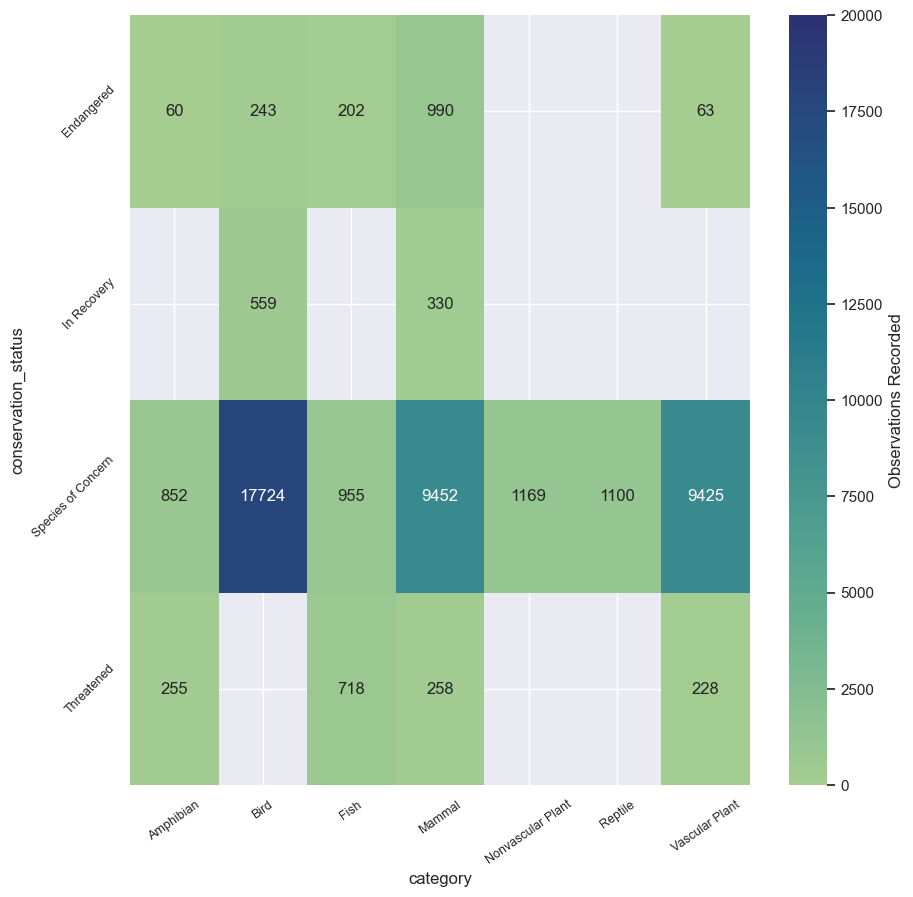

<Figure size 640x480 with 0 Axes>

In [9]:
vmin = 0
vmax = 20000
#plotting the cross tab for Yellowstone National Park
plt.figure(figsize=(10,10))
df_park = all_data[all_data['park_name'] == 'Yellowstone National Park']
pd_cross_tab = pd.crosstab(df_park['conservation_status'], all_data['category'], values=all_data['observations'], aggfunc='sum')
sn.heatmap(pd_cross_tab,annot=True, fmt='g', cbar_kws={"label": "Observations Recorded"}, cmap='crest', vmin=vmin, vmax=vmax)
plt.xticks(rotation=35, fontsize=9)
plt.yticks(rotation=45, fontsize=9)
plt.show()
plt.clf()


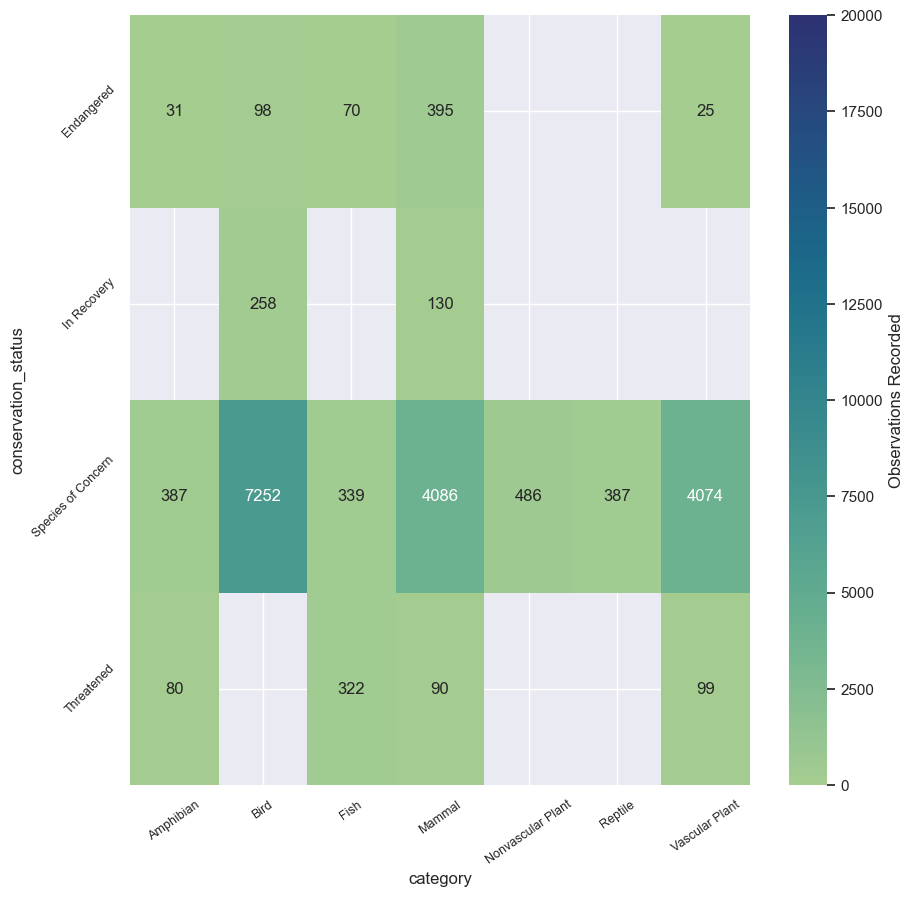

<Figure size 640x480 with 0 Axes>

In [13]:
#plotting the cross tab for Bryce National Park
plt.figure(figsize=(10,10))
df_park = all_data[all_data['park_name'] == 'Bryce National Park']
pd_cross_tab = pd.crosstab(df_park['conservation_status'], all_data['category'], values=all_data['observations'], aggfunc='sum')
sn.heatmap(pd_cross_tab,annot=True, fmt='g', cbar_kws={"label": "Observations Recorded"}, cmap='crest',vmin=vmin, vmax=vmax)
plt.xticks(rotation=35, fontsize=9)
plt.yticks(rotation=45, fontsize=9)
plt.show()
plt.clf()

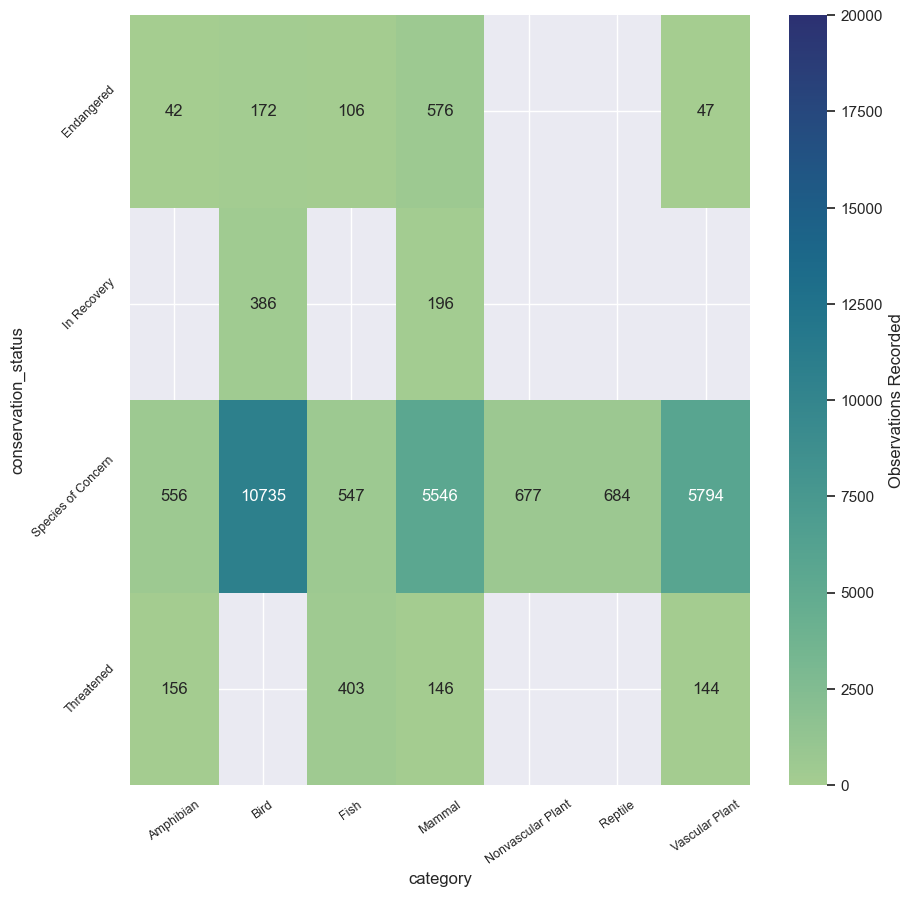

<Figure size 640x480 with 0 Axes>

In [14]:
#plotting the cross tab for Yosemite National Park
plt.figure(figsize=(10,10))
df_park = all_data[all_data['park_name'] == 'Yosemite National Park']
pd_cross_tab = pd.crosstab(df_park['conservation_status'], all_data['category'], values=all_data['observations'], aggfunc='sum')
sn.heatmap(pd_cross_tab,annot=True, fmt='g', cbar_kws={"label": "Observations Recorded"}, cmap='crest', vmin=vmin, vmax=vmax)
plt.xticks(rotation=35, fontsize=9)
plt.yticks(rotation=45, fontsize=9)
plt.show()
plt.clf()

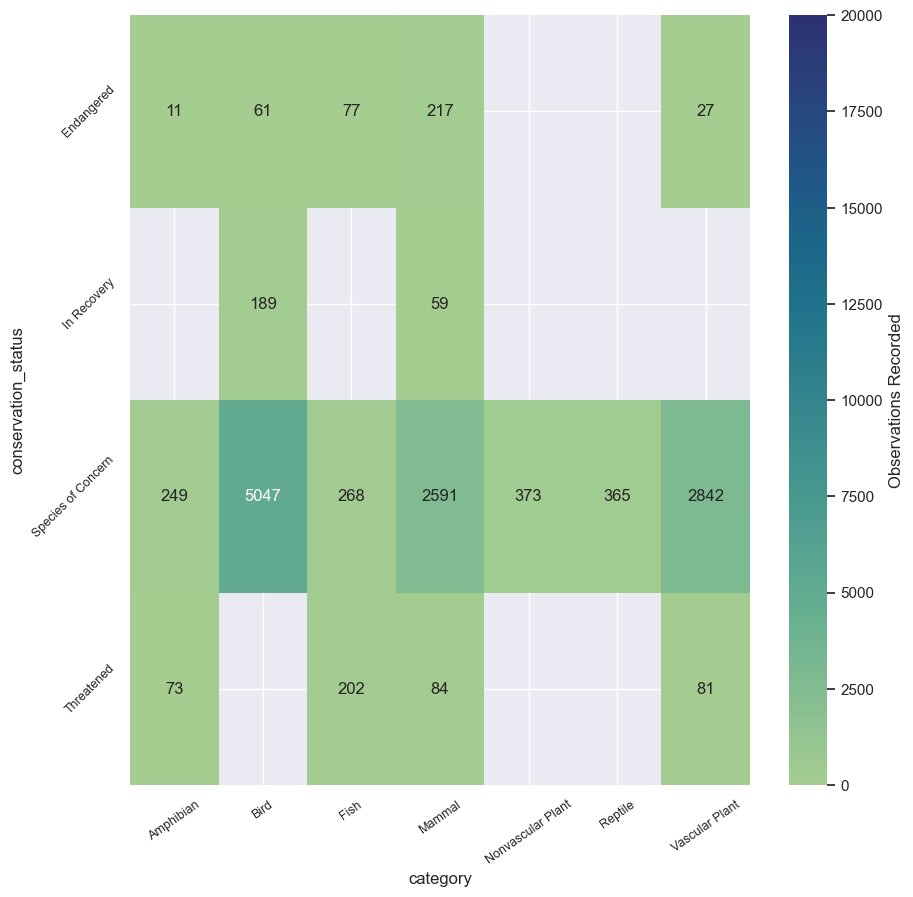

<Figure size 640x480 with 0 Axes>

In [15]:
#plotting the cross tab for Great Smoky Mountains National Park
plt.figure(figsize=(10,10))
df_park = all_data[all_data['park_name'] == 'Great Smoky Mountains National Park']
pd_cross_tab = pd.crosstab(df_park['conservation_status'], all_data['category'], values=all_data['observations'], aggfunc='sum')
sn.heatmap(pd_cross_tab,annot=True, fmt='g', cbar_kws={"label": "Observations Recorded"}, cmap='crest', vmin=vmin, vmax=vmax)
plt.xticks(rotation=35, fontsize=9)
plt.yticks(rotation=45, fontsize=9)
plt.show()
plt.clf()

## Conclusions

## Appendix